# import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as pe
import joblib as jb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# importing the data from your device!

In [2]:
df=pd.read_csv(r"E:\codsoft\credit card\fraudTrain.csv")
tes_df=pd.read_csv(r"E:\codsoft\credit card\fraudTest.csv")

In [3]:
# aujusting the view of the data
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
# checking for the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# time management
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_time'] = df['trans_date_trans_time'].dt.time
tes_df['trans_date_trans_time'] = pd.to_datetime(tes_df['trans_date_trans_time'])
tes_df['trans_time'] = tes_df['trans_date_trans_time'].dt.time

In [7]:
# delete the unwanted and non predictive data
d= ['Unnamed: 0', 'first', 'last', 'gender', 'job', 'dob', 'trans_num', 'trans_date_trans_time','street']
df = df.drop(columns=d)
dt= ['Unnamed: 0', 'first', 'last', 'gender', 'job', 'dob', 'trans_num', 'trans_date_trans_time','street']
tes_df = tes_df.drop(columns=dt)

In [8]:
df.head()

,cc_num,merchant,category,amt,city,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_time
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Moravian Falls,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,00:00:18
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,00:00:44
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Malad City,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,00:00:51
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Boulder,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,00:01:16
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Doe Hill,VA,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,00:03:06


# Data Visualization

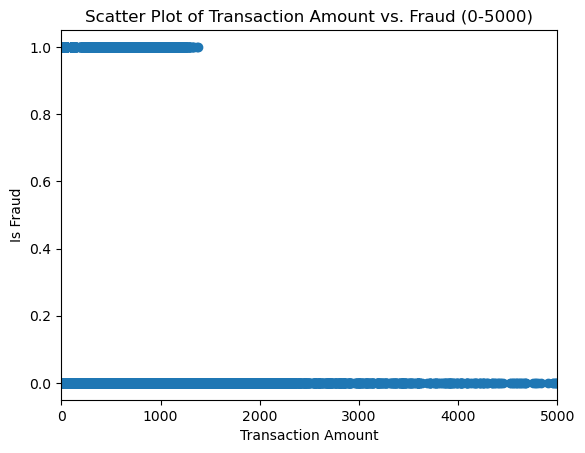

In [9]:
plt.scatter(df['amt'], df['is_fraud'])
plt.xlabel('Transaction Amount')
plt.ylabel('Is Fraud')
plt.title('Scatter Plot of Transaction Amount vs. Fraud (0-5000)')
plt.xlim(0, 5000)
plt.show()

### the above scatter plot shows the fraud are done below 2000

# convert the word to num using label encoder

In [10]:
c=['merchant','city','category','state','trans_time']
le=LabelEncoder()
for i in c:
    df[i]=le.fit_transform(df[i])
    tes_df[i]=le.fit_transform(tes_df[i])

In [11]:
df

,cc_num,merchant,category,amt,city,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_time
0,2703186189652095,514,8,4.97,526,27,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,18
1,630423337322,241,4,107.23,612,47,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,44
2,38859492057661,390,0,220.11,468,13,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,51
3,3534093764340240,360,2,45.00,84,26,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,76
4,375534208663984,297,9,41.96,216,45,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,499,0,15.56,330,44,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0,43928
1296671,6011149206456997,2,1,51.70,813,20,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0,43939
1296672,3514865930894695,599,1,105.93,346,32,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0,43952
1296673,2720012583106919,509,1,74.90,471,41,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0,44016


# model implementation

In [12]:
model=LogisticRegression()
y_train=df["is_fraud"]
x_train=df.drop("is_fraud",axis="columns")
model.fit(x_train,y_train)

C:\Users\yadee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
model.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
model.score(x_train,y_train)

0.9942113482561166

# predicting the unseen data

In [15]:
y_test=tes_df["is_fraud"]
x_test=tes_df.drop("is_fraud",axis="columns")

In [16]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
model.score(x_test,y_test)

0.9961401355721147

#### this shows that our model performs better with this dataset and test data set has better score than training data set

# Save the model

In [18]:
jb.dump(model,"CCF")

['CCF']